In [185]:
## import necessary libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import MinMaxScaler, StandardScaler, normalize
from sklearn.decomposition import PCA

##import libraries for ANN

import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout 
from tensorflow.keras.models import Sequential
from mlxtend.plotting import plot_confusion_matrix


In [186]:
## load the dataset
Heart = pd.read_csv('heart_failure_clinical_records_dataset.csv')
Heart

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,45.00,0,582,0,14,0,166000.00,0.80,127,1,0,14,1
1,75.00,1,246,0,15,0,127000.00,1.20,137,1,0,10,1
2,42.00,1,250,1,15,0,213000.00,1.30,136,0,0,65,1
3,70.00,0,212,1,17,1,389000.00,1.00,136,1,1,188,0
4,46.00,0,168,1,17,1,271000.00,2.10,124,0,0,100,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,60.00,0,3964,1,62,0,263358.03,6.80,146,0,0,43,1
295,50.00,0,582,0,62,1,147000.00,0.80,140,1,1,192,0
296,65.00,0,157,0,65,0,263358.03,1.50,138,0,0,10,1
297,54.00,1,427,0,70,1,151000.00,9.00,137,0,0,196,1


In [187]:
Heart.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [188]:
Heart.drop_duplicates()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,45.00,0,582,0,14,0,166000.00,0.80,127,1,0,14,1
1,75.00,1,246,0,15,0,127000.00,1.20,137,1,0,10,1
2,42.00,1,250,1,15,0,213000.00,1.30,136,0,0,65,1
3,70.00,0,212,1,17,1,389000.00,1.00,136,1,1,188,0
4,46.00,0,168,1,17,1,271000.00,2.10,124,0,0,100,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,60.00,0,3964,1,62,0,263358.03,6.80,146,0,0,43,1
295,50.00,0,582,0,62,1,147000.00,0.80,140,1,1,192,0
296,65.00,0,157,0,65,0,263358.03,1.50,138,0,0,10,1
297,54.00,1,427,0,70,1,151000.00,9.00,137,0,0,196,1


## The dataset is clean, there is no Blank and No Duplicated items


##Model building/ Creating Variables

Choosing DEATH_EVENT as dependent as the rest od features as independent for now



In [189]:
## Creat variables
x = Heart.iloc[:, 0:12]
y = Heart.iloc[:, 12]

In [190]:
## splitting our data
## 80 % training 20% for testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=32)

In [191]:
##Describing  Heart data, find mean, median,std, Min, Max, LQ,Median, UQ in 2 decimal place 

pd.options.display.float_format = '{:.2f}'.format
Heart.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.00,299.00,299.00,299.00,299.00,299.00,299.00,299.00,299.00,299.00,299.00,299.00,299.00
mean,60.83,0.43,581.84,0.42,38.08,0.35,263358.03,1.39,136.63,0.65,0.32,130.26,0.32
std,11.89,0.50,970.29,0.49,11.83,0.48,97804.24,1.03,4.41,0.48,0.47,77.61,0.47
min,40.00,0.00,23.00,0.00,14.00,0.00,25100.00,0.50,113.00,0.00,0.00,4.00,0.00
25%,51.00,0.00,116.50,0.00,30.00,0.00,212500.00,0.90,134.00,0.00,0.00,73.00,0.00
50%,60.00,0.00,250.00,0.00,38.00,0.00,262000.00,1.10,137.00,1.00,0.00,115.00,0.00
75%,70.00,1.00,582.00,1.00,45.00,1.00,303500.00,1.40,140.00,1.00,1.00,203.00,1.00
max,95.00,1.00,7861.00,1.00,80.00,1.00,850000.00,9.40,148.00,1.00,1.00,285.00,1.00


In [192]:
##checking the column to make sure we chose the correct columns
x_train

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
155,66.00,1,68,1,38,1,162000.00,1.00,136,0,0,95
293,42.00,0,582,0,60,0,263358.03,1.18,137,0,0,82
183,90.00,1,47,0,40,1,204000.00,2.10,132,1,1,8
217,41.00,0,148,0,40,0,374000.00,0.80,140,1,1,68
15,59.00,0,66,1,20,0,70000.00,2.40,134,1,0,135
...,...,...,...,...,...,...,...,...,...,...,...,...
71,60.00,0,2656,1,30,0,305000.00,2.30,137,1,0,30
252,65.00,0,118,0,50,0,194000.00,1.10,145,1,1,200
88,45.00,1,981,0,30,0,136000.00,1.10,137,1,0,11
43,60.00,1,156,1,25,1,318000.00,1.20,137,0,0,85


In [193]:
## standard scaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [194]:
## Initialize the model of neural network
model = Sequential()

In [195]:
### input layers---unit is the number of neurons, more unit more complex pattern, it may lead to overfitting--depend on the complexity of model--
# starting n=16 a big as my parameter--the next paramert is canaliser which is uniform, the next 
# Relu is activation function, changes the negative numbers to zero, introduce liniarity in our network
#we saw our x_train was 12 and our dependent was the last one
model.add(Dense(units= 64, kernel_initializer = 'uniform', activation = 'relu',input_dim = 12))


## hidden layers, the first neuron was  16so the second layer we make it half =8 and we don't need input_dim
##I tried afre units and the best ones was 64 and 32 which gave me max accuracy
model.add(Dense(units= 32, kernel_initializer = 'uniform', activation = 'relu'))

## regularization--which help us to stop overfitting- we need to select the percentage of dropout like 25%
model.add(Dropout(0.25))

##Output 
# Layer- when we work with binary classification that we have only 2 labels then n=1 
# if we work with a multiclass classification n will be based on how many class we have
# the activation also will change from relu to sigmoid( because it is binary and the result is 0 and 1)
model.add(Dense(units= 1, kernel_initializer = 'uniform', activation = 'sigmoid'))


In [196]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [197]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 64)                832       
                                                                 
 dense_21 (Dense)            (None, 32)                2080      
                                                                 
 dropout_6 (Dropout)         (None, 32)                0         
                                                                 
 dense_22 (Dense)            (None, 1)                 33        
                                                                 
Total params: 2945 (11.50 KB)
Trainable params: 2945 (11.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


///If we had some words or objects we would use encoder to make it works:
##from sklearn.preprocessing import LabelEncoder
##label_encoder = LabelEncoder()
##y_train_encoded = label_encoder.fit_transform(y_train)
##y_test_encoded = label_encoder.transform(y_test)

In [198]:
## train the network--train the data batch by batch, based on experiment here =32
## epochs, need to be careful if it is small it will be underfitting if it high may be overfitting 
## for validation data we may use test data sometime we use validation split not only test set
## we can say validation_split =(X-test, y_test) or some percent of whole sample
history = model.fit(x_train, y_train, batch_size = 32, epochs = 20, validation_split = 0.25)

Epoch 1/20


6/6 [==============================] - 1s 37ms/step - loss: 0.6923 - accuracy: 0.5978 - val_loss: 0.6910 - val_accuracy: 0.7000
Epoch 2/20
6/6 [==============================] - 0s 10ms/step - loss: 0.6895 - accuracy: 0.6704 - val_loss: 0.6877 - val_accuracy: 0.7000
Epoch 3/20
6/6 [==============================] - 0s 8ms/step - loss: 0.6861 - accuracy: 0.6816 - val_loss: 0.6835 - val_accuracy: 0.7000
Epoch 4/20
6/6 [==============================] - 0s 8ms/step - loss: 0.6809 - accuracy: 0.6816 - val_loss: 0.6775 - val_accuracy: 0.7000
Epoch 5/20
6/6 [==============================] - 0s 9ms/step - loss: 0.6721 - accuracy: 0.6983 - val_loss: 0.6686 - val_accuracy: 0.7000
Epoch 6/20
6/6 [==============================] - 0s 9ms/step - loss: 0.6606 - accuracy: 0.7151 - val_loss: 0.6557 - val_accuracy: 0.7167
Epoch 7/20
6/6 [==============================] - 0s 9ms/step - loss: 0.6432 - accuracy: 0.7486 - val_loss: 0.6377 - val_accuracy: 0.7167
Epoch 8/20
6/6 [===========================

##We can save the result and you don't want to run again

In [199]:
## Save my model--- give it a name
model.save('Heart_model')

INFO:tensorflow:Assets written to: Heart_model\assets


INFO:tensorflow:Assets written to: Heart_model\assets


In [200]:
##Load saved model-we want to see our saved model
ANN_model = tf.keras.models.load_model('Heart_model')

##now we need to prediction like the other models

In [201]:
## model prediction on the test data---before we just said model predict but here has been save in a file so we 
y_pred_Heart= ANN_model.predict(x_test)
y_pred_Heart

2/2 [==============================] - 0s 0s/step


array([[0.1733766 ],
       [0.4114213 ],
       [0.05027993],
       [0.1826002 ],
       [0.09282369],
       [0.7474862 ],
       [0.7956071 ],
       [0.2082191 ],
       [0.03824249],
       [0.01841424],
       [0.05940483],
       [0.70692426],
       [0.02285859],
       [0.7569808 ],
       [0.08750656],
       [0.06589578],
       [0.61423075],
       [0.11739346],
       [0.15097074],
       [0.8513263 ],
       [0.12735264],
       [0.8648236 ],
       [0.07148168],
       [0.7298011 ],
       [0.12856126],
       [0.7159015 ],
       [0.02930375],
       [0.5678619 ],
       [0.45450372],
       [0.00494385],
       [0.62522596],
       [0.06929073],
       [0.8108469 ],
       [0.03232373],
       [0.08119586],
       [0.3205229 ],
       [0.69108224],
       [0.00583114],
       [0.43484086],
       [0.24253516],
       [0.63645357],
       [0.89440787],
       [0.06374493],
       [0.0119    ],
       [0.13976748],
       [0.47302663],
       [0.6072138 ],
       [0.815

In [202]:
## set a threshold-- we need to put it in this variable....
y_pred_Heart = np.where(y_pred_Heart > 0.5, 1, 0)  ## if it is bigger than 0.5 put 1 , else put 0
y_pred_Heart

array([[0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0]])

In [203]:
y_test

109    0
264    0
285    0
19     0
123    0
242    1
103    0
296    1
204    0
115    0
180    0
199    1
167    0
29     0
193    0
161    0
247    0
214    0
91     0
8      1
66     0
60     1
132    0
23     0
101    0
44     1
286    0
148    1
135    0
262    0
14     1
272    0
20     1
156    0
56     0
87     1
151    0
255    0
177    1
18     0
54     0
12     1
283    0
179    0
131    0
113    0
17     1
28     1
222    1
130    1
218    0
164    0
216    0
248    0
209    0
268    0
270    0
11     1
45     1
150    1
Name: DEATH_EVENT, dtype: int64

In [204]:
y_pred_Heart.shape

(60, 1)

In [205]:
y_test.shape

(60,)

In [206]:
##we need to flatten ---inserting the changes in them , we don't use the new name it will be confuesing
y_pred_Heart = y_pred_Heart.flatten()

In [207]:
### put them in datafram
pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_Heart}).sample(10)

,Actual,Predicted
248,0,0
216,0,0
199,1,1
151,0,1
113,0,0
66,0,0
270,0,0
56,0,0
268,0,0
29,0,1


In [208]:
## classification report
print(classification_report(y_test, y_pred_Heart))

              precision    recall  f1-score   support

           0       0.88      0.85      0.86        41
           1       0.70      0.74      0.72        19

    accuracy                           0.82        60
   macro avg       0.79      0.80      0.79        60
weighted avg       0.82      0.82      0.82        60



In [209]:
## model evaluation
accuracy_ANN_model = accuracy_score(y_test, y_pred_Heart)
## model evaluation
print('Accuracy (ANN):', (metrics.accuracy_score(y_test, y_pred_Heart))*100, '%')
## confusion matrix
conf_mat = confusion_matrix(y_test, y_pred_Heart)

print(accuracy_ANN_model)
print(conf_mat)

Accuracy (ANN): 81.66666666666667 %
0.8166666666666667
[[35  6]
 [ 5 14]]


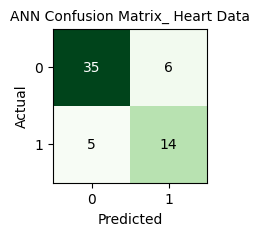

In [210]:
## confusion matrix plot
conf_mat = confusion_matrix(y_test, y_pred_Heart)
fig, ax = plot_confusion_matrix(conf_mat, figsize=(2,2), cmap=plt.cm.Greens)
plt.xlabel('Predicted', fontsize = 10)
plt.ylabel('Actual', fontsize = 10)
plt.title('ANN Confusion Matrix_ Heart Data', fontsize = 10)
plt.show()

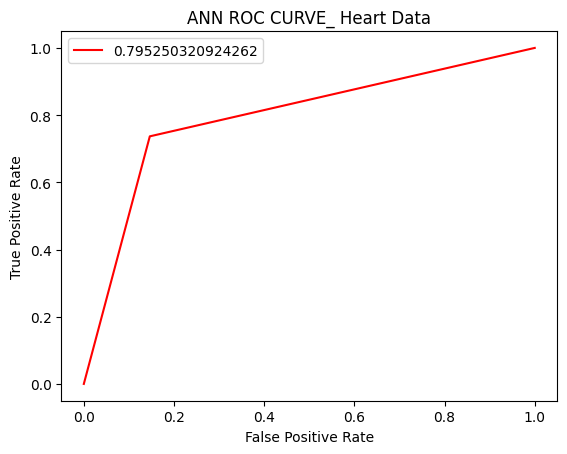

In [211]:
auc_Heart= roc_auc_score(y_test, y_pred_Heart)
fpr, tpr, _ = roc_curve(y_test, y_pred_Heart)
plt.plot(fpr, tpr, color = 'Red', label = auc_Heart)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ANN ROC CURVE_ Heart Data')
plt.legend()
plt.show()